In [20]:
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast 


#loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()


#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [21]:
df_GM = df[(df['job_title'] == 'Data Analyst')&(df['job_country'] == 'Germany')].copy()

In [22]:
df_GM['job_posted_month_no'] = df_GM['job_posted_date'].dt.month

In [23]:
df_GM_explode = df_GM.explode('job_skills')

In [24]:
df_GM_pivot = df_GM_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)
df_GM_pivot.loc['Total'] = df_GM_pivot.sum()
df_GM_pivot =  df_GM_pivot[df_GM_pivot.loc['Total'].sort_values(ascending=False).index]
df_GM_pivot = df_GM_pivot.drop('Total')

In [25]:
DA_totals = df_GM.groupby('job_posted_month_no').size()

In [26]:
df_GM_percent = df_GM_pivot.div(DA_totals/100,axis=0)

In [27]:
df_GM_percent = df_GM_percent.reset_index()
df_GM_percent['job_posted_month'] = df_GM_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_GM_percent = df_GM_percent.set_index('job_posted_month')
df_GM_percent = df_GM_percent.drop(columns='job_posted_month_no')
df_GM_percent

job_skills,sql,python,tableau,r,power bi,excel,looker,qlik,sap,go,...,microstrategy,nltk,powershell,seaborn,symphony,tidyr,unity,vb.net,webex,visual basic
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,71.875000,56.250000,46.875000,25.000000,18.750000,18.750000,9.375000,6.250000,0.000000,12.500000,...,0.000000,0.000000,0.000000,0.000000,3.125,0.000000,0.000000,0.000000,3.125,3.125
Feb,53.846154,48.717949,33.333333,10.256410,25.641026,28.205128,12.820513,10.256410,2.564103,12.820513,...,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000,0.000
Mar,61.363636,45.454545,25.000000,22.727273,36.363636,31.818182,0.000000,4.545455,4.545455,4.545455,...,2.272727,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000,0.000
Apr,53.191489,59.574468,14.893617,34.042553,17.021277,10.638298,8.510638,4.255319,6.382979,10.638298,...,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000,0.000
May,60.526316,55.263158,34.210526,28.947368,18.421053,21.052632,10.526316,5.263158,5.263158,5.263158,...,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000,0.000
Jun,70.833333,62.500000,25.000000,25.000000,16.666667,4.166667,8.333333,12.500000,0.000000,20.833333,...,0.000000,0.000000,0.000000,0.000000,0.000,4.166667,0.000000,0.000000,0.000,0.000
Jul,64.285714,53.571429,25.000000,21.428571,17.857143,25.000000,7.142857,10.714286,3.571429,10.714286,...,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000,0.000
Aug,57.894737,47.368421,26.315789,21.052632,21.052632,10.526316,10.526316,21.052632,10.526316,15.789474,...,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000,0.000
Sep,36.363636,23.232323,18.181818,11.111111,18.181818,12.121212,3.030303,4.040404,5.050505,3.030303,...,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,1.010101,0.000,0.000


In [29]:
df_plot = df_GM_percent.iloc[:, :5]

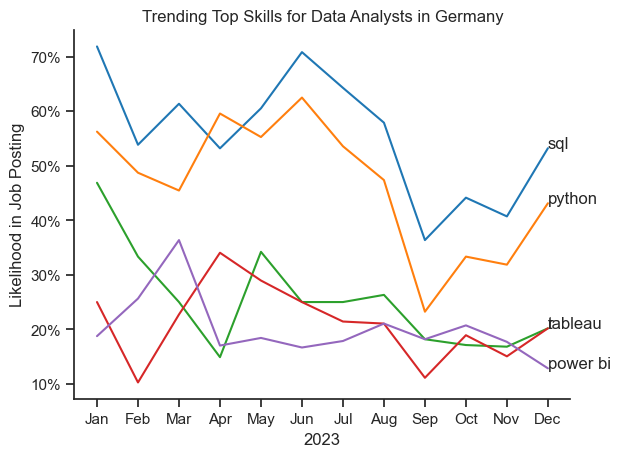

In [37]:
sns.lineplot(data=df_plot, dashes=False, palette='tab10') 
sns.set_theme(style='ticks')
sns.despine()

plt.title('Trending Top Skills for Data Analysts in Germany')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()
from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter())

for i in range(5):
    plt.text(11, df_plot.iloc[-1, i], df_plot.columns[i])

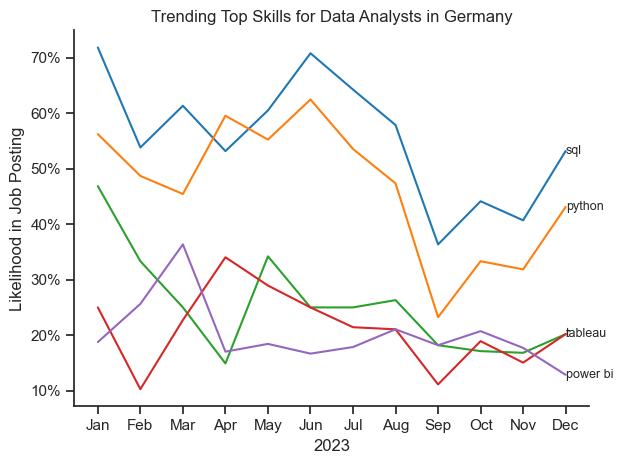

In [38]:
from matplotlib.ticker import PercentFormatter

# Set theme before plotting
sns.set_theme(style='ticks')

# Create line plot
ax = sns.lineplot(data=df_plot, dashes=False, palette='tab10')

# Clean up axis
sns.despine()
ax.yaxis.set_major_formatter(PercentFormatter())

# Labels
plt.title('Trending Top Skills for Data Analysts in Germany')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')

# Remove legend
if ax.get_legend() is not None:
    ax.get_legend().remove()

# Add labels at the end of lines
for i, column in enumerate(df_plot.columns):
    plt.text(
        x=df_plot.index[-1],   # Last time point on x-axis
        y=df_plot[column].iloc[-1],  # Last value of the line
        s=column,
        va='center',
        fontsize=9
    )

plt.tight_layout()
plt.show()
